In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #
from tensorflow.keras.models import Sequential #
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D 
#Dense=computational unit make less
#Dropout = Numerical unit drop

In [5]:
#cd /path
#!unzip /path or archive.zip
num_classes = 2 #cat and dog
img_row = 64
img_col = 64 #image size
train_dataset = "E:\\AIBroadway\\AromaticVsAliphatic\\Train"
test_dataset = "E:\\AIBroadway\\AromaticVsAliphatic\\Test"

In [6]:
#data augmentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 30,
width_shift_range = 0.4,
height_shift_range = 0.4,
horizontal_flip = True,
fill_mode='nearest')

In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dataset,
    target_size=(img_row,img_col),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

Found 360 images belonging to 2 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    test_dataset,
    target_size=(img_row,img_col),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

Found 90 images belonging to 2 classes.


In [10]:
model = Sequential() #feature map
#input layer for convolution
model.add(Conv2D(64,(3,3),padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#hidden layer conv
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(16,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#flatten conv
model.add(Flatten())#single layer 1D
model.add(Dense(256)) #only few send
model.add(Activation('relu'))
model.add(Dropout(0.5)) #size decrease
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

In [11]:
#neural network
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=16, activation = 'relu')) # only +
model.add(Dense(1))
model.add(Activation('sigmoid')) #0 or 1 output layer ma yes or no softmax do for probality
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

In [12]:
#comile before traing
#training
model.compile(loss='binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 360//32,
    epochs = 10,
    validation_data= validation_generator,
    validation_steps = 90//32
)

D:\Other\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
11/11 [==============================] - 191s 18s/step - loss: 0.7052 - accuracy: 0.4634 - val_loss: 0.6929 - val_accuracy: 0.5312
Epoch 2/10
11/11 [==============================] - 169s 16s/step - loss: 0.6939 - accuracy: 0.4909 - val_loss: 0.6873 - val_accuracy: 0.5156
Epoch 3/10
11/11 [==============================] - 174s 16s/step - loss: 0.6896 - accuracy: 0.5518 - val_loss: 0.6618 - val_accuracy: 0.4531
Epoch 4/10
11/11 [==============================] - 179s 17s/step - loss: 0.7047 - accuracy: 0.5488 - val_loss: 0.6186 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 172s 16s/step - loss: 0.6586 - accuracy: 0.5976 - val_loss: 0.6557 - val_accuracy: 0.7656
Epoch 6/10
11/11 [==============================] - 178s 16s/step - loss: 0.6406 - accuracy: 0.5884 - val_loss: 0.3596 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 171s 16s/step - loss: 0.6601 - accuracy: 0.5457 - val_loss: 0.5531 - val_accuracy: 0.9062
Epoch 

In [13]:
model.save('E:\\AIBroadway\\AromaticVsAliphatic\\aromatic_vs_aliphatic.h5')

In [15]:
#test
from tensorflow.python.keras.utils.generic_utils import class_and_config_for_serialized_keras_object
import numpy as np #to convert array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

classifier = load_model('E:\\AIBroadway\\AromaticVsAliphatic\\aromatic_vs_aliphatic.h5')
test_image = image.load_img('E:\\AIBroadway\\AromaticVsAliphatic\\Test\\Aliphatic\\1 (31).jpg',target_size = (64,64,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
print(result)
if result > 0.6:
  print("This is aliphatic")
else:
  print("This is aromatic")

[[1.7166979e-09]]
This is aromatic


In [16]:
history.history

{'loss': [0.7052390575408936,
  0.6938574314117432,
  0.6896181106567383,
  0.7047069668769836,
  0.6585848927497864,
  0.6405605673789978,
  0.6601431965827942,
  0.6060853600502014,
  0.613195538520813,
  0.6952558755874634],
 'accuracy': [0.46341463923454285,
  0.4908536672592163,
  0.5518292784690857,
  0.5487805008888245,
  0.5975610017776489,
  0.5884146094322205,
  0.5457317233085632,
  0.6335227489471436,
  0.6280487775802612,
  0.5335366129875183],
 'val_loss': [0.6928892731666565,
  0.687312662601471,
  0.6618484854698181,
  0.6185639500617981,
  0.6557390689849854,
  0.3595740497112274,
  0.5530956983566284,
  0.29229283332824707,
  0.3342307209968567,
  0.44502735137939453],
 'val_accuracy': [0.53125,
  0.515625,
  0.453125,
  1.0,
  0.765625,
  1.0,
  0.90625,
  1.0,
  1.0,
  0.96875]}

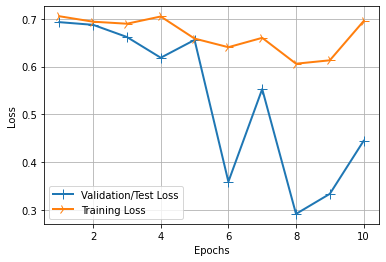

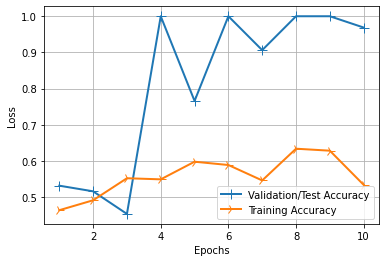

In [17]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history #

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

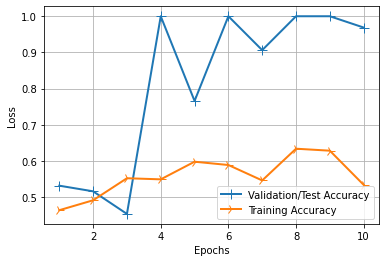

In [18]:
# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()